# Basic Statistics, Modeling, and the Mathematics Needed 

### Learning goals:
1. learn about simple probability distributions models 
2. learn about fitting models using calculus
3. learn about the differences/similarities between least squares and maximum likelihood. 
4. learn about representing more complex models (e.g. multivariate regression) using linear algebra 


There is a lot of material, but don't worry if you don't understand everything. The aim was to try to put as many important concepts as possible in one place. Hopefully, it'll be a good resource moving forward. 

**If you want me to slow down, just ask!!**



## Let's get some data

We are going to import a set of STAI scores, a commonly used measure for trait anxiety. 


In [2]:
# let's store our data as a dataframe
import pandas as pd
stai_scores = pd.read_csv('STAI_Scores.csv')
stai_scores.head()

,STAI_Trait
0,56
1,50
2,49
3,27
4,35


In [3]:
# but make an x array for computations / plotting
x = stai_scores.as_matrix()[:,0]



Let's plot our data as a histogram.

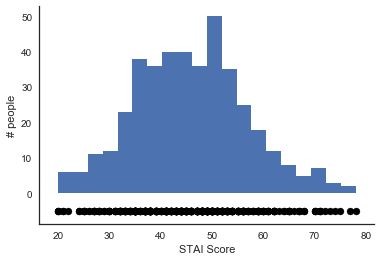

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')
plt.hist(x,bins=20)
plt.scatter(x,np.zeros(len(x))-5,color='k')
sns.despine()
plt.xlabel('STAI Score')
plt.ylabel('# people')

## Simple Probability Distributions as Models

Plotting the data is cool, but can we say more? What if we want to ask a question like: How likely is it that a randomly chosen person has a STAI score greater than 60?

To answer this question, we need a **probablistic model** for of our data. 

First, we'll denote the STAI score of each person as $x_i$. This $x_i$ is called a **random variable**. It is a variable because it takes on different values, and it's random because each of it's possible values are associated with a different probability of occuring. 

The assignment of probabilities to each of the values of $x_i$ constitute a **probability distribution**, denoted as $p(x_i)$. Continuous valued x's have distributions defined by probability density functons, while discrete valued x's have distributions defined by probality mass functions. In either case, the probabilities must sum (or integrate) to 1 one across all possible values. We often interpret probabilities as long-run frequencies for each value, but they can be interpreted in other ways as well (ie. degrees of certainty).
    
Our probability distribution for $x_i$ is our probablistic model. And it is really just a quantification of our uncertainty; we can't say what STAI score someone will have, because we don't know anything about them, so we just give different possibilities different probabilities. It's useful to distinguish probablistic models from mechanical or causal models that specifies how phenomenon arises.


### A Normal Distribution as a Model

So for STAI scores, we are going to use a normal (Gaussian) distribution as a model, but there are many more possible distributions we could have chosen.  

The probability (density) for any particular $x_i$ and can be calculated using this function (**the probability density function**): 

$$ p(x_i; \mu,\sigma) = \frac{1}{\sqrt(2\pi \sigma^2)} \exp{\frac{-(x_i-\mu)^2}{2\sigma^2}} $$

Our distribution is parameterized by a mean, $\mu$ and variance $\sigma^2$. Parameters come after the ';' in the function input to make it clear that they are specified ahead of time and are not *random*. 

We can also short-hand our model as: 

$$ x_i \sim Norm(\mu,\sigma) $$

So far, we've just been talking about a single person's score. The model for our entire dataset of n participants is: 

$$ p(x_1, x_2, ..., x_n; \mu, \sigma) = \prod_i^n  p(x_i; \mu, \sigma) $$

This is called the **joint probability density** function. We've assumed that the scores for each person are independent of each other; the value of one person's score is not determined by another person's score. This allows us to multiply the individual probability density functions together to form our joint model. This becomes important for model estimation. 

Let's plot our model, without any data, for the moment. 

In [5]:
# we write down the density function for a single x, using the formula above. 
def normal_pdf(x,mu,sigma):
    return((1.0/np.sqrt(2*np.pi*sigma**2))*np.exp(-1.0*((x-mu)**2)/(2*sigma**2)))

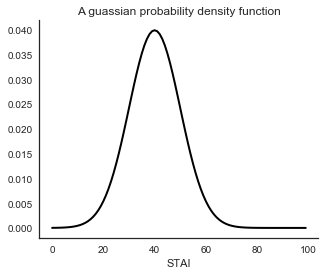

In [6]:
# then we generate a range of possible values for x 
x = np.arange(0,100,1)

# choose some values for mean and variance. 
mu = 40
sigma=10

# and we plot the corresponding probability (density) for each value
fig,ax = plt.subplots(1,1,figsize=(5,4))
ax.plot(x, normal_pdf(x,mu,sigma), 'k-', lw=2, label='frozen pdf')
ax.set_title('A guassian probability density function')
ax.set_xlabel('STAI')
sns.despine()

## Fitting A Probability Distribution to Data



At this point, we've chosen to model our data using a normal distribution, but we still have not chosen parameter values. 

To choose parameters, we are first going to use an approach called **maximum likelihood** (ML). Intuitively, we are going to look for the parameters that yield the model that best matches our data. Quantitatively, we are going to find the parameter values that maximize the output of our joint probability density function with the data as input. 

Here however, instead of calling it a joint probability density, we call it a **likelihood function**. Instead of fixing the parameters and inputing data points into the function to calculate their probability, we fix the data and input the parameters into the function to calculate their likelihood. So, we should always say "the likelihood of the parameters" and the "probability of the data". Here is the likelihood function. 


$$ L( \mu, \sigma; x_1, x_2, ..., x_n) = \prod_i^n  l(\mu,\sigma; x_i) $$

We can plot our likelihood function (for a single value) in python, and it'll look exactly the same as before. Take note of the which values are fixed however. 


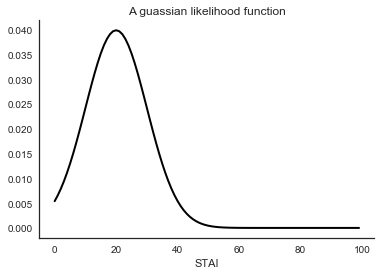

In [8]:
# For the likelihood function, we keep our data fixed 
x = 20

# And vary the parameters (mu in this case, but we could have also varied sigma creating a 2-D likelihood surface)
mus = np.arange(0,100,1)

# We use the same function as before 
lik = [normal_pdf(x,mu,10) for mu in mus]

# And plot
fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(mus,lik, 'k-', lw=2, label='frozen pdf')
ax.set_title('A guassian likelihood function')
ax.set_xlabel('STAI')
sns.despine()


Next, we are going to choose the parameters that maximize this function. 

But first... a little calculus. 


## Math Aside 1: Function Max(Min)imization and Calculus


### Function maximization with derivatives 

We have some function f(x). How do we choose the value of x that maximizes the function? Calculus taught us that the slope of the line (the derivative) is 0 at both maxima or minima, so all we have to do to maximize a function is:
1. calculate its derivative
2. set the derivative equal to 0
3. re-arrange for x, so we know which x corresponds to the deriative equal to 0. 
4. check whether it's a minima or maxima (using 2nd derivative) (though we can often skip this step)

For example, let's say we have the function $ f(x) = -3(x-2)^2 + 4 $. It's derivative is $ \frac{df(x)}{dx}= -6(x-2) $. Setting it equal to zero, $ 0 = -6(x-2) $, and solving, yields $ x = 2 $. 


Some useful rules: 
- the derivative of a constant is 0. 
- chain rule. If F(x)=f(g(x)), then F'(x) = f'(g(x)) = f'(g(x))g'(x). I used this above for (x-2)^2. It's used in almost every derivation you'll ever need to do, so it's worth memorizing. 

Here's drawing of a function and it derivative (included here mainly to break up the text). For simple functions, we can find the minima or maxima analytically (by hand). However, for some functions (ie. neural networks) we instead need do an iterative process. One iterative process worth mentioning is called gradient descent. 


<div>
<h3 align="center"></h3>
<img src="./images/derivative.png" style="width: 300px;"/>

</div>


### Multivariate function maximization with partial derivatives

Now we have a function with multiple inputs, say f(x1,x2). We need to find the pair of values that maximizes the function. In order to do this, we can take the derivatives separately for each input variable, set = 0, and solve for that variable. The pair where both slopes are 0, will again correspond to a minima or maxima (for convex functions at least).

The derivative for each variable separately is called a **partial derivative**. They are denoted many different ways, but I'll use: $ \frac{d}{d x_1}f(x_1,x_2) $ and $ \frac{d}{d x_2}f(x_1,x_2) $ 

Some useful rules: 
- the derivative of a term not including the variable of differentiation is also 0. (e.g. $f(x_1,x_2) = x_2^2+x_1$, $ \frac{d}{dx_2}f(x_1,x_2) = 2x_2$

## Back to Fitting our Normal Distribution Model with Maximum Likelihood

We left off trying to maximize: 

$$ L( \mu, \sigma; x_1, x_2, ..., x_n) = \prod_i^n  l(\mu,\sigma; x_i) $$


### Getting the log likelihood function

However, before we take derivatives, it'll be easier if we log() the entire function. This will also help for numerical reasons - we can't multiply more than a few probabilities on a computer before we underflow!

So if we log() our likelihood function, 

$$ log(L( \mu, \sigma; x_1, x_2, ..., x_n)) = log(\prod_i^n  l(\mu,\sigma;x_i)) $$

We get, noting that Log(A*B) = Log(A)+Log(B):

$$ l( \mu, \sigma; x_1, x_2, ..., x_n) = \sum_i^n  log(l(\mu,\sigma;x_i))) $$

Now we can plug in normal density function:

$$  = \sum_i^n log(\frac{1}{\sqrt(2\pi \sigma^2)} \exp{\frac{-(x_i-\mu)^2}{2\sigma^2}}) $$

And apply some more rules of logs (e.g. that log(exp(x))=x): 

$$  = \sum_i^n  \frac{1}{2} log(2\pi)- \frac{1}{2} log(\sigma^2)-\frac{(x_i-\mu)^2}{2\sigma^2} $$ 

Let's group similar terms and move the sum in. This will be our final **loglikelihood function**:  

$$ l( \mu, \sigma; x) =  \frac{n}{2}log(2\pi)- \frac{n}{2}log(\sigma^2)-\frac{1}{2\sigma^2} \sum_i^n (x_i-\mu)^2 $$

### Taking Derivatives
Now we can take derivatives of this $ l( \mu, \sigma; x)$ with respect to (w.r.t) each parameter and set = 0. 

Let's do the mean $\mu$ first. 

$$  \frac{d}{d\mu}l( \mu, \sigma; x) = 0 + 0 + \frac{d}{d\mu}(\frac{1}{2\sigma^2} \sum_i^n (x_i-\mu)^2) $$ 

Now we use the chain rule: 

$$  \frac{d}{d\mu}l( \mu, \sigma; x) = \frac{2}{\sigma^2} \sum_i^n (x_i-\mu) $$ 

We can divide the sigma out and can collect all the same terms: 

$$  0 = \sum_i^n (x_i)-n\mu $$ 

Then we just re-arange to get $\mu$.

$$   \mu = \frac{1}{n} \sum_i^n (x_i) $$


We'll denote this $\mu$ which maximizes the likelihood function, $\mu_{ml} $. 

Here we haven't really talked about sample vs. population means, but we've just shown that the sample mean is the ML estimate if our distribution is a normal distribution!

For the variance we have these two terms that depend on $ \sigma^2$: 

$$  \frac{1}{2\sigma^2} \sum_i^n (x_i-\mu)^2 + \frac{n}{2}log(\sigma^2) $$ 

We can follow the steps found here: https://www.statlect.com/fundamentals-of-statistics/normal-distribution-maximum-likelihood

To obtain: 

$$ \hat \sigma^2_{ml} = \frac{1}{n} \sum_i^n (x_i-\hat \mu)^2 $$

Notice that the ML estimate is not the same as our typical sample estimate for variance. (There's no n-1). 


Now, let's do maximum likelihood estimation of a gaussian in python. 

In [10]:
# we can do MLE fit using scipy
from scipy.stats import norm
?norm.fit()

In [11]:
x = stai_scores.as_matrix()[:,0]
mu, std = norm.fit(x)
print(mu)
print(std)

45.7699757869
10.8722660363


In [12]:
# which matches our hand calculations
print(x.mean())
print(x.std())


45.7699757869
10.8722660363


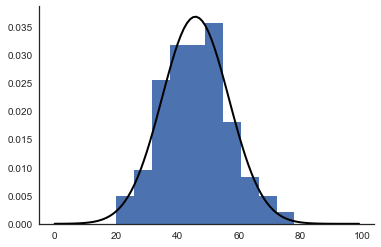

In [13]:
# we can also plot our fitted distribution. 
plt.hist(x,normed=True)
x = np.arange(0,100,1)
plt.plot(x, normal_pdf(x,mu,std), 'k-', lw=2, label='frozen pdf')
sns.despine()

We can also answer our original question for what is the probability of getting a STAI above 45. For this we'll use the cumulative distributio function (cdf).


In [14]:
print('P(STAI>60): {0}'.format(1-norm.cdf(60,loc=mu,scale=std)))

P(STAI>60): 0.09529478301141092


## Fitting with Least Squares?

This will make more sense when we get to regression, but I thought I'd introduce least squares here. 

**Least squares** is another method for finding parameters of a model, but as part of the procedure, we have no need to specify the probablistic part of the model. 

In this case, we are just going to parameterize our data with a single parameter $\hat x$. You can think of this as the best guess we can make of a new data point, given only one parameter to work with. 

To choose our parameter, we again need some definition of goodness(poorness) of fit. **Least squares loss** is the loss function we often use: $ls(x) = \sum_i (x_i-\hat x_i)^2$. This tells us how poorly our single parameter predicts/fits all the other data points. 

Now, we want to choose $\hat x$ to minimize this loss. So we can calculate the derivative just like above. 


$$ \frac{d}{d\hat x} ls(x)= \frac{d}{d\hat x} \sum_i (x_i-\hat x_i)^2 $$
$$ \frac{d}{d\hat x} ls(x)= 2 \sum_i^n x_i  -  \hat x   $$
$$ 0 = 2 \sum_i^n x_i  -  \hat x   $$
$$ \hat x  = \frac{1}{n} \sum x_i  $$

So we again get the sample mean again for our least squares parameter. *Different starting point, same answer.*



## Multivariate Data





Ok, so now let's add another trait, BDI, which measures symptoms of depression, and some measure of task performance. 


In [15]:
# we are just going to generate it randomly
bdi = np.random.normal(mu, std, len(stai_scores))
stai = np.random.normal(mu, std, len(stai_scores))
task_perf = np.random.normal(mu, std, len(stai_scores))

In [16]:
df = pd.DataFrame(data={'task_perf (y)':task_perf,'bdi (x2)':bdi,'stai (x1)':stai})
df.head()

,bdi (x2),stai (x1),task_perf (y)
0,33.641666,29.881586,26.430968
1,32.052881,32.921737,59.727073
2,39.389517,52.281401,48.960107
3,23.563198,57.042610,48.905205
4,52.198715,58.436331,60.154898


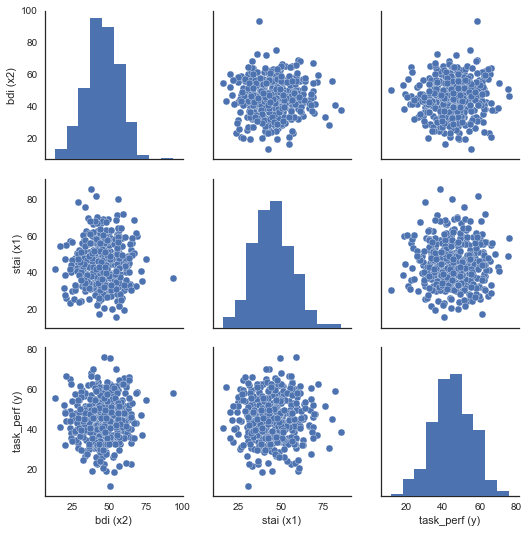

In [17]:
# we can plot our data 
import seaborn as sns
sns.pairplot(df)

## (Probablistic) Multivariate Linear Regression

Now, we are going to create a model of all 3 variables. Since we have 3 variables, we could be interested in modeling the joint distribution of all 3 as p(y,x1,x2). However, more often we are interested in the effects that some variables have on another. So, instead, we are going to model the conditional probability of p(y|x1,x2).  

For regression, we assume that a good way to model p(y,x1,x2) is as a linear combination of our other variables, with some noise. (I've switched to super scripts here to denote each data point). 

$$y^i = \beta_0 + \beta_1 x_1^i  + \beta_2 x_2^i + \epsilon^i$$

For regression, we often no longer specify a probability distribution for x, p(x). We instead move the randomness to a noise term $\epsilon$. For most regression analyses, we assume that errors are normally distributed:  

$$ e^i \sim Norm(0,\sigma) $$


So given that, we can equivalently write the model as:

$$y^i \sim Norm(\beta_0 + \beta_1 x_1^i  + \beta_2 x_2^i, \sigma) $$

We have 4 parameters: $( \beta_0, \beta_2, \beta1,\sigma)$

We can also write the model as: 

$$ p(y|x1,x2;\beta_0,\beta_1,\beta_2,\sigma)$$


Note that '|' means conditional probability while ';' denotes parameters. 

We can visualize our model as little gaussians at each value of x (here shown with only one x).  


<div>
<h3 align="center">Linear Regression Model</h3>
<img src="./images/regression_gaussians.png" style="width: 500px;"/>

</div>

## Fitting a Multivariate Regression Model

### Maximum Likelihood.. 


Likelihood function: 


$$ L(y|x1,x2;\beta_0,\beta_1,\beta_2,\sigma) = \prod_i^n p(y|x1,x2;\beta_0,\beta_1,\beta_2,\sigma) $$

LogLikelihood function: 


$$ l(y|x_1,x_2;\beta_0,\beta_1,\beta_2,\sigma) = \sum_i^n p(y^i|x_1^i,x_2^i;\beta_0,\beta_1,\beta_2,\sigma) $$

If we are then looking to take the derivative with respect to each $\beta$. We can skip all the way too:  

$$  \frac{d}{d\beta_1}l(y|x_1,x_2;\beta_0,\beta_1,\beta_2,\sigma) = \frac{d}{d\beta_1} (\frac{1}{2\sigma^2} \sum_i^n (\beta_0 + \beta_1 x_1  + \beta_2 x_2-y)^2) $$ 

But then it get's really, **really** tedious to do the rest of the basic algebra. 

So we are going to go to linear algebra to make things easier!



## Our Data and Model with Matrices and Vectors 

Writing things as vectors and matrices is a short-hand way of working with multidimensional data. But it's more than that - it can give you insights into the problems and models you wouldn't have had. 

First, let's write our data into vectors. 

$\mathbf{y}$ is an $n \times 1$ vector (where $n$ is the number of datapoints in your dataset). The bold text is used to denote a vector. 
$$
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\ 
\vdots\\ 
y^{(n)}
\end{bmatrix}
$$


Then, we have a $\mathbf{x}$  vector for each x variable (BDI or STAI). 

$$
\begin{bmatrix}
x_{1}^{(0)}\\
x_{1}^{(1)}\\ 
\vdots\\ 
x_{1}^{(n)}
\end{bmatrix}
$$


Then, we can stack all of these x vectors together. $\mathbf{X}$ is a $n \times k$ vector (where $k$=2 here) (switched to denoting observations by the row index):
$$ 
\begin{bmatrix}
x_{1,1} & \ldots & x_{1, k} \\
\vdots & \ddots & \vdots \\
x_{n,1} & \ldots & x_{n, k}
\end{bmatrix} 
$$    
    
We can also write our parameters as a vector: 
$$
\begin{bmatrix}
\beta_{0}\\
\beta_{1}\\ 
\vdots\\ 
\beta_{2}
\end{bmatrix}
$$


All together we get: 


<div>
<h3 align="center"></h3>
<img src="./images/mlr1.png" style="width: 500px;"/>

</div>


Ok, before we go on to estimating the parameters of this model, we need a few more lessons from linear algebra... 

## Math Aside 2:  Linear Algebra

Linear Algebra (LA) is a branch of mathematics concernings vectors (vector spaces) and linear mappings. Why 'algebra'? It's because LA is a new set of rules for manipulating vectors and matrices with operations like addition, multiplication etc. 



### Vectors

For our purposes, vectors are just arrays of numbers (called *scalars*), most often observations and predictions. 

It is often useful to think about visualizing vectors. A vector with 2 elements is a point on a plane, a vector with 3 elements is point in space, and a vector with N elements a point in an N-dimensional space… which most people find hard to imagine.


In [21]:
# Let's create two 2-element vectors
u = np.array([2, 5])
v = np.array([3, 1])

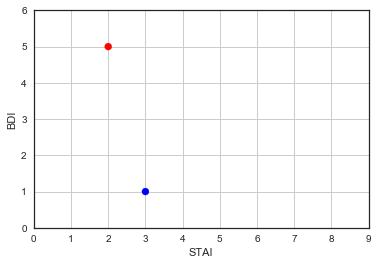

In [22]:
# and visualize them. 
x_coords, y_coords = zip(u, v)
plt.scatter(x_coords, y_coords, color=["r","b"])
plt.axis([0, 9, 0, 6])
plt.grid()
plt.xlabel('STAI')
plt.ylabel("BDI")
plt.show()


Vectors can also be represented as arrows.

In [23]:
def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

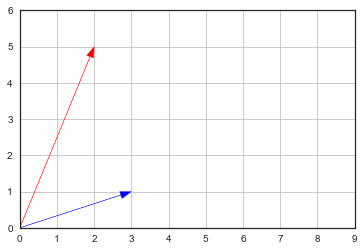

In [24]:
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

We can also define the what's called a **norm** of a vector $\textbf{u}$, denoted as $\left \Vert \textbf{u} \right \|$, which is a measures the length (a.k.a. the magnitude) of $\textbf{u}$. There are multiple possible norms, but the most common one (and the only one we will discuss here) is the Euclidian norm, which is defined as:

$\left \Vert \textbf{u} \right \| = \sqrt{\sum_{i}{\textbf{u}_i}^2}$

**This will come up in maximum likelihood estimation and least squares. **

Vectors of same size can be added together. **Addition** is performed *elementwise*:

In [25]:
print(" ", u)
print("+", v)
print("-"*10)
u + v

  [2 5]
+ [3 1]
----------


array([5, 6])

We can visualize vector addition like this (tip to tail): 


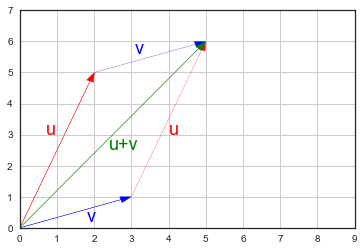

In [26]:
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plot_vector2d(v, origin=u, color="b", linestyle="dotted")
plot_vector2d(u, origin=v, color="r", linestyle="dotted")
plot_vector2d(u+v, color="g")
plt.axis([0, 9, 0, 7])
plt.text(0.7, 3, "u", color="r", fontsize=18)
plt.text(4, 3, "u", color="r", fontsize=18)
plt.text(1.8, 0.2, "v", color="b", fontsize=18)
plt.text(3.1, 5.6, "v", color="b", fontsize=18)
plt.text(2.4, 2.5, "u+v", color="g", fontsize=18)
plt.grid()
plt.show()

Vector addition is **commutative**, meaning that $\textbf{u} + \textbf{v} = \textbf{v} + \textbf{u}$. You can see it on the previous image: following $\textbf{u}$ *then* $\textbf{v}$ leads to the same point as following $\textbf{v}$ *then* $\textbf{u}$.

Vector addition is also **associative**, meaning that $\textbf{u} + (\textbf{v} + \textbf{w}) = (\textbf{u} + \textbf{v}) + \textbf{w}$.


Vectors can be **multiplied by scalars**. All elements in the vector are multiplied by that number, for example:

In [27]:
print("1.5 *", u, "=")

1.5 * u

1.5 * [2 5] =


array([ 3. ,  7.5])

We can also calculate what's called a **dot product** (also called *scalar product* or *inner product* in the context of the Euclidian space) of two vectors $\textbf{u}$ and $\textbf{v}$.  is a useful operation that comes up fairly often in linear algebra. It is noted $\textbf{u} \cdot \textbf{v}$, or sometimes $⟨\textbf{u}|\textbf{v}⟩$ and it is defined as:

$\textbf{u} \cdot \textbf{v} = \left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \| \times cos(\theta)$

where $\theta$ is the angle between $\textbf{u}$ and $\textbf{v}$.

Another way to calculate the dot product is:

$\textbf{u} \cdot \textbf{v} = \sum_i{\textbf{u}_i \times \textbf{v}_i}$


Which demonstrates that it is a really useful way of representing a sum: 

### Matrices
Matrices can often just be thought of as a list of vectors. However, they also can represent and perform linear transformations such rotations, translations and scaling.

In order to **index a matrix**, we use the number located in the $i^{th}$ row, and $j^{th}$ column of a matrix $X$ is sometimes noted $X_{i,j}$ or $X_{ij}$. 

$X = \begin{bmatrix}
  x_{1,1} & x_{1,2} & x_{1,3} & \cdots & x_{1,n}\\
  x_{2,1} & x_{2,2} & x_{2,3} & \cdots & x_{2,n}\\
  x_{3,1} & x_{3,2} & x_{3,3} & \cdots & x_{3,n}\\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  x_{m,1} & x_{m,2} & x_{m,3} & \cdots & x_{m,n}\\
\end{bmatrix}$



If two matrices $Q$ and $R$ have the same size $m \times n$, they can be added together. **Addition** is performed *elementwise*: the result is also a $m \times n$ matrix $S$ where each element is the sum of the elements at the corresponding position: $S_{i,j} = Q_{i,j} + R_{i,j}$

$S =
\begin{bmatrix}
  Q_{11} + R_{11} & Q_{12} + R_{12} & Q_{13} + R_{13} & \cdots & Q_{1n} + R_{1n} \\
  Q_{21} + R_{21} & Q_{22} + R_{22} & Q_{23} + R_{23} & \cdots & Q_{2n} + R_{2n}  \\
  Q_{31} + R_{31} & Q_{32} + R_{32} & Q_{33} + R_{33} & \cdots & Q_{3n} + R_{3n}  \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  Q_{m1} + R_{m1} & Q_{m2} + R_{m2} & Q_{m3} + R_{m3} & \cdots & Q_{mn} + R_{mn}  \\
\end{bmatrix}$

For example, let's create a $2 \times 3$ matric $B$ and compute $A + B$:

Addition is **commutative**, meaning that $A + B = B + A$:

It is also **associative**, meaning that $A + (B + C) = (A + B) + C$:

A matrix $M$ can be **multiplied by a scalar** $\lambda$. The result is noted $\lambda M$, and it is a matrix of the same size as $M$ with all elements multiplied by $\lambda$:

$\lambda M =
\begin{bmatrix}
  \lambda \times M_{11} & \lambda \times M_{12} & \lambda \times M_{13} & \cdots & \lambda \times M_{1n} \\
  \lambda \times M_{21} & \lambda \times M_{22} & \lambda \times M_{23} & \cdots & \lambda \times M_{2n} \\
  \lambda \times M_{31} & \lambda \times M_{32} & \lambda \times M_{33} & \cdots & \lambda \times M_{3n} \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  \lambda \times M_{m1} & \lambda \times M_{m2} & \lambda \times M_{m3} & \cdots & \lambda \times M_{mn} \\
\end{bmatrix}$


We can also **multiply matrices**, but this is a bit more involved. 

A matrix $Q$ of size $m \times n$ can be multiplied by a matrix $R$ of size $n \times q$. It is noted simply $QR$ without multiplication sign or dot. The result $P$ is an $m \times q$ matrix where each element is computed as a sum of products:

$P_{i,j} = \sum_{k=1}^n{Q_{i,k} \times R_{k,j}}$

The element at position $i,j$ in the resulting matrix is the sum of the products of elements in row $i$ of matrix $Q$ by the elements in column $j$ of matrix $R$.

$P =
\begin{bmatrix}
Q_{11} R_{11} + Q_{12} R_{21} + \cdots + Q_{1n} R_{n1} &
  Q_{11} R_{12} + Q_{12} R_{22} + \cdots + Q_{1n} R_{n2} &
    \cdots &
      Q_{11} R_{1q} + Q_{12} R_{2q} + \cdots + Q_{1n} R_{nq} \\
Q_{21} R_{11} + Q_{22} R_{21} + \cdots + Q_{2n} R_{n1} &
  Q_{21} R_{12} + Q_{22} R_{22} + \cdots + Q_{2n} R_{n2} &
    \cdots &
      Q_{21} R_{1q} + Q_{22} R_{2q} + \cdots + Q_{2n} R_{nq} \\
  \vdots & \vdots & \ddots & \vdots \\
Q_{m1} R_{11} + Q_{m2} R_{21} + \cdots + Q_{mn} R_{n1} &
  Q_{m1} R_{12} + Q_{m2} R_{22} + \cdots + Q_{mn} R_{n2} &
    \cdots &
      Q_{m1} R_{1q} + Q_{m2} R_{2q} + \cdots + Q_{mn} R_{nq}
\end{bmatrix}$

You may notice that each element $P_{i,j}$ is the dot product of the row vector $Q_{i,*}$ and the column vector $R_{*,j}$:

$P_{i,j} = Q_{i,*} \cdot R_{*,j}$

So we can rewrite $P$ more concisely as:

$P =
\begin{bmatrix}
Q_{1,*} \cdot R_{*,1} & Q_{1,*} \cdot R_{*,2} & \cdots & Q_{1,*} \cdot R_{*,q} \\
Q_{2,*} \cdot R_{*,1} & Q_{2,*} \cdot R_{*,2} & \cdots & Q_{2,*} \cdot R_{*,q} \\
\vdots & \vdots & \ddots & \vdots \\
Q_{m,*} \cdot R_{*,1} & Q_{m,*} \cdot R_{*,2} & \cdots & Q_{m,*} \cdot R_{*,q}
\end{bmatrix}$


 **matrix multiplication is *NOT* commutative**: in general $QR ≠ RQ$
 
 On the other hand, **matrix multiplication *is* associative**, meaning that $Q(RS) = (QR)S$. Let's create a $4 \times 5$ matrix $G$ to illustrate this:


It is also ***distributive* over addition** of matrices, meaning that $(Q + R)S = QS + RS$. For example:

Sometimes it is useful to transpose a matrix (flip the rows and columns). The transpose of a matrix $M$ is a matrix noted $M^T$ such that the $i^{th}$ row in $M^T$ is equal to the $i^{th}$ column in $M$:

$ A^T =
\begin{bmatrix}
  10 & 20 & 30 \\
  40 & 50 & 60
\end{bmatrix}^T =
\begin{bmatrix}
  10 & 40 \\
  20 & 50 \\
  30 & 60
\end{bmatrix}$

In other words, ($A^T)_{i,j}$ = $A_{j,i}$


## Back Estimating Parameters for our Linear Model  

We had our model: 

$$ \mathbf{y} = \mathbf{X}\mathbf{\beta} +\mathbf{e} $$

And we want to estimate $\hat \beta$. This time let's do least squares estimation from the start and put aside our normal distributions. 

This time for least squares our $\hat y$ is a bit more interesting. It's $X\hat \beta$. 

Let's again use our **least squares loss function** between our predictions $\hat y$ and our data $y$. 

$$LS(\mathbf{y}, \hat{\mathbf{y}}) = \sum_{i=1}^j(y_i - \hat{y}_i)^2 $$

We can re-write that in matrix notation (note the use of the norm here): 

$$
\begin{align}
LS(\mathbf{y}, \hat{\mathbf{y}}) &= || \mathbf{y} - \hat{\mathbf{y}}||^2 \\
&= || \mathbf{y} - \mathbf{X}\beta||^2 
\end{align}
$$



Before we try to minimize this loss, let's expand it out. 


$$
\begin{align*}
LS(\mathbf{y}, \hat{\mathbf{y}}) &= || \mathbf{y} - \hat{\mathbf{y}} ||^2 \\
&= ||\mathbf{y} - \mathbf{Xb}||^2 \\
&= (\mathbf{y} - \mathbf{Xb})^\top (\mathbf{y} - \mathbf{Xb}) \\
&= (\mathbf{y}^\top - \mathbf{b}^\top \mathbf{X}^\top )(\mathbf{y} - \mathbf{Xb}) &&\text{matrix product } (\mathbf{AB})^\top = \mathbf{B}^\top \mathbf{A}^\top \\
&= \mathbf{y}^\top \mathbf{y} - \mathbf{y}^\top \mathbf{Xb} - \mathbf{b}^\top \mathbf{X}^\top \mathbf{y} + \mathbf{X}^\top \mathbf{b}^\top\mathbf{Xb}
\end{align*}
$$

Looks pretty hairy... 

But let's pause here for a moment to examine the terms $ \mathbf{y}^\top \mathbf{Xb}$ and $\mathbf{b}^\top \mathbf{X}^\top \mathbf{y}$. To begin, let's find the dimensionality of each term. Recall that:
- $\mathbf{y}$ is an $n \times 1$ vector
- $\mathbf{X}$ is an $n \times k$ matrix
- $\mathbf{b}$ is a $k \times 1$ vector

Using this information, we can see that both terms are just single scalar values. In particular, for $ \mathbf{y}^\top \mathbf{Xb}$, the inner product $\mathbf{y}^\top\mathbf{X}$ yields an $1 \times k$ vector, whose product with $\mathbf{b}$ yields a single number. Similarly, for $\mathbf{b}^\top \mathbf{X}^\top \mathbf{y}$ the inner product $\mathbf{b}^\top \mathbf{X}^\top$ yields a $1 \times n$ vector, whose product with $\mathbf{y}$ is also just a single number.

Let's dive a bit deeper. In non-matrix notation, $ \mathbf{y}^\top \mathbf{Xb}$ represents the operation:

$$
\begin{align}
\sum_{i=1}^{n} y_i  \left(\sum_{m=1}^{k} X_{i,m} b_m \right) = \sum_{i=1}^{n} \sum_{m=1}^{k} y_i X_{i,m} b_m
\end{align}
$$

For $\mathbf{X}^\top \mathbf{b}^\top \mathbf{y}$, the operation _exactly the same_:

$$
\begin{align}
\sum_{i=1}^{n} y_i \left(\sum_{m=1}^{k} b_m X_{i,m}  \right) = \sum_{i=1}^{n} \sum_{m=1}^{k} y_i X_{i,m} b_m
\end{align}
$$

Hence, we have that

$$\mathbf{X}^\top \mathbf{b}^\top \mathbf{y} = \mathbf{y}^\top \mathbf{Xb}$$

With this in mind, we can simplify our equation for $LS$ to

$$LS(\mathbf{y}, \hat{\mathbf{y}}) = \mathbf{y}^\top \mathbf{y} - 2 \mathbf{y}^\top \mathbf{Xb} + \mathbf{X}^\top \mathbf{b}^\top\mathbf{Xb}$$

Now that we have our equation for $LS$ in terms of the coefficient vector $\mathbf{b}$, we can go about finding the (partial) derivative with respect to $\beta$.

We have:

\begin{align*}
    \frac{\partial}{\partial \beta} LS &= \frac{\partial}{\partial \beta} (\mathbf{y}^\top \mathbf{y} - 2 \mathbf{y}^\top \mathbf{X}\beta + \mathbf{X}^\top \beta^\top\mathbf{X}\beta) \\
    &= -2 \mathbf{X}^\top \mathbf{y} + 2 \mathbf{X}^\top \mathbf{X}\beta
\end{align*}

Now that we have the formula for the derivative with respect to $\mathbf{b}$, we can set it to 0 and solve for $\hat{\mathbf{b}}$:

$$
\begin{align*}
    0 = -2 \mathbf{X}^\top \mathbf{y} + 2 \mathbf{X}^\top \mathbf{Xb} \\
    \mathbf{X}^\top \mathbf{y} = \mathbf{X}^\top \mathbf{Xb}\\
    \hat{\mathbf{b}} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}\\
\end{align*}
$$

Thus, we now have an analytic formula for the coefficients which minimize the $LS$ given an arbitrary data matrix.

In [28]:
# Let's do this in python

# first we stack our data
X = np.vstack((np.ones(len(bdi)),bdi,stai)).T
y = task_perf[:,np.newaxis]

print(np.shape(X))
print(np.shape(y))


(413, 3)
(413, 1)


In [29]:
# then we can calculate the coefficients by hand.. 
B = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
print(np.round(B,3))

[[  4.44600000e+01]
 [ -1.60000000e-02]
 [  3.70000000e-02]]


In [32]:
# let's compare to a statistics package.. 
import statsmodels.api as sm
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.2946
Date:                Wed, 25 Oct 2017   Prob (F-statistic):              0.745
Time:                        01:11:14   Log-Likelihood:                -1593.3
No. Observations:                 413   AIC:                             3193.
Df Residuals:                     410   BIC:                             3205.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.4602      3.271     13.590      0.0

## Bonus: Least Hat Estimator as "Projecting Y onto X"

### Projecting a point onto an axis
The dot product is also very useful to project points onto an axis. The projection of vector $\textbf{v}$ onto $\textbf{u}$'s axis is given by this formula:

$\textbf{proj}_{\textbf{u}}{\textbf{v}} = \dfrac{\textbf{u} \cdot \textbf{v}}{\left \Vert \textbf{u} \right \| ^2} \times \textbf{u}$

Which is equivalent to:

$\textbf{proj}_{\textbf{u}}{\textbf{v}} = (\textbf{v} \cdot \hat{\textbf{u}}) \times \hat{\textbf{u}}$

We can visualize it as follows: 

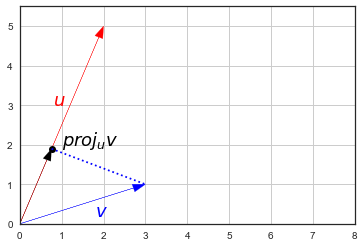

In [33]:
import numpy.linalg as LA
LA.norm(u)

u_normalized = u / LA.norm(u)
proj = v.dot(u_normalized) * u_normalized

plot_vector2d(u, color="r")
plot_vector2d(v, color="b")

plot_vector2d(proj, color="k", linestyle=":")
plt.plot(proj[0], proj[1], "ko")

plt.plot([proj[0], v[0]], [proj[1], v[1]], "b:")

plt.text(1, 2, "$proj_u v$", color="k", fontsize=18)
plt.text(1.8, 0.2, "$v$", color="b", fontsize=18)
plt.text(0.8, 3, "$u$", color="r", fontsize=18)

plt.axis([0, 8, 0, 5.5])
plt.grid()
plt.show()



### Matrix multiplication as a linear transformations
More generally, any linear transformation $f$ that maps n-dimensional vectors to m-dimensional vectors can be represented as an $m \times n$ matrix. For example, say $\textbf{u}$ is a 3-dimensional vector:

$\textbf{u} = \begin{pmatrix} x \\ y \\ z \end{pmatrix}$

and $f$ is defined as:

$f(\textbf{u}) = \begin{pmatrix}
ax + by + cz \\
dx + ey + fz
\end{pmatrix}$

This transormation $f$ maps 3-dimensional vectors to 2-dimensional vectors in a linear way (ie. the resulting coordinates only involve sums of multiples of the original coordinates). We can represent this transformation as matrix $F$:

$F = \begin{bmatrix}
a & b & c \\
d & e & f
\end{bmatrix}$

Now, to compute $f(\textbf{u})$ we can simply do a matrix multiplication:

$f(\textbf{u}) = F \textbf{u}$

If we have a matric $G = \begin{bmatrix}\textbf{u}_1 & \textbf{u}_2 & \cdots & \textbf{u}_q \end{bmatrix}$, where each $\textbf{u}_i$ is a 3-dimensional column vector, then $FG$ results in the linear transformation of all vectors $\textbf{u}_i$ as defined by the matrix $F$:

$FG = \begin{bmatrix}f(\textbf{u}_1) & f(\textbf{u}_2) & \cdots & f(\textbf{u}_q) \end{bmatrix}$

To summarize, the matrix on the left hand side of a dot product specifies what linear transormation to apply to the right hand side vectors. This can be used to perform projections and rotations, but any other linear transformation is possible. For example, here is a transformation known as a *shear mapping* (with a flipping of axes). 


<div>
<h3 align="center"></h3>
<img src="./images/linear_transformation_2d_m1_m1_1_3.png" style="width: 500px;"/>

</div>



Here's a rotation and an expansion. 


<div>
<h3 align="center"></h3>
<img src="./images/linear_transformation_2d_m2_0_0_m2.png" style="width: 500px;"/>

</div>


You can try to imagine you data laying in the 1 by 1 grid and then imagine a matrix multiplication stretching, squeezing, rotating your data. Although I don't have any good examples here, 'loosely' imaging these types of transformations can give you a lot of statistical insight. 

### Least Squares Estimates as a Projection Matrix 
Predicted outcomes ŷ are the orthogonal projection of y onto the columnspace of X (that spans a subspace of Rn).

$$ \hat{\beta} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}$$


<div>
<h3 align="center"></h3>
<img src="./images/ls_projection.png " style="width: 500px;"/>

</div>
